# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

## The paper was reviewed by three experts in the field.
The main issue is if the contribution is sufficiently novel to warrant publication in JMLR. I have to concur with the third reviewer who felt that the improvement the paper demonstrated over existing works is marginal. The onus is on the authors to demonstrate that the contribution is significant. In particular the improvement over Yu et. al (2009) and Even-dar et. al (2009) does not strike me as significant. 

Moreover, the adaptation of the setting considered by Rakhlin (2012) does not seem to produce much in terms of theoretical value: the mixing assumptions make this problem essentially (almost) IID. 
As a result, I have to concur with the third reviewer and consider this contribution as not novel enough for JMLR. 
What could change my mind is a result that is not covered (in spirit) by existing works (the 2009 papers and more recent works). For example, much weaker mixing conditions, stronger bounds under special cases, dealing with infinite state space MDPs (that are realistic: not just for the sake of dealing with those), etc.

My sense is that this is a very nice summary of existing works and a new perspective to prove existing results and mildly improve them. However, the novelty of the proposed method is just not clear enough.

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTC9GB12kkWwLTXDxL6Cnzq3qVa70jNPCELC9YwCk16qiEgeJGv "Logo Title Text 1")


In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [3]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d100/4e86d2106d0566c6ad9843d882e72791333b08be3d647dcae4f4b110.csv')
#Dates = np.arange('2005-01-01', '2014-12-31', dtype='datetime64[D]')
df = df.set_index('Date').sort()
Dates = np.unique(df.index)
Dates = list(filter(lambda a: a[-5:] != '02-29', Dates))
Dates_1 = list(filter(lambda a: a[:4] != '2015', Dates))
Record_high= []
Record_low= []
for date in Dates_1:
    Record_high.append(df.loc[date]['Data_Value'].max())        
for date in Dates_1:
    Record_low.append(df.loc[date]['Data_Value'].min()) 
len(Record_high)
    

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  app.launch_new_instance()


3616

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


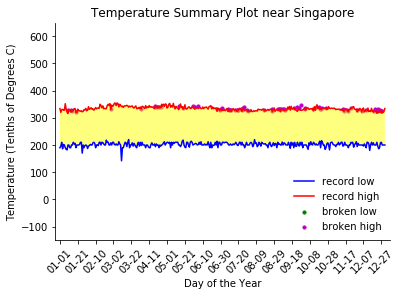

In [68]:
df2 = pd.read_csv('data/C2A2_data/BinnedCsvs_d100/4e86d2106d0566c6ad9843d882e72791333b08be3d647dcae4f4b110.csv')
df2.sort(['ID','Date']).head()
df2['Year'], df2['Month-Date'] = zip(*df2['Date'].apply(lambda x: (x[:4], x[5:])))
df2 = df2[df2['Month-Date'] != '02-29']
temp_min = df2[(df2['Element'] == 'TMIN') & (df2['Year'] != '2015')].groupby('Month-Date').aggregate({'Data_Value':np.min})
temp_max = df2[(df2['Element'] == 'TMAX') & (df2['Year'] != '2015')].groupby('Month-Date').aggregate({'Data_Value':np.max})
temp_min_15 = df2[(df2['Element'] == 'TMIN') & (df2['Year'] == '2015')].groupby('Month-Date').aggregate({'Data_Value':np.min})
temp_max_15 = df2[(df2['Element'] == 'TMAX') & (df2['Year'] == '2015')].groupby('Month-Date').aggregate({'Data_Value':np.max})
broken_min = np.where(temp_min_15['Data_Value'] < temp_min['Data_Value'])[0]
broken_max = np.where(temp_max_15['Data_Value'] > temp_max['Data_Value'])[0]
plt.figure()
plt.plot(temp_min.values, 'b', label = 'record low')
plt.plot(temp_max.values, 'r', label = 'record high')
plt.scatter(broken_min, temp_min_15.iloc[broken_min], s = 10, c = 'g', label = 'broken low')
plt.scatter(broken_max, temp_max_15.iloc[broken_max], s = 10, c = 'm', label = 'broken high')
plt.gca().axis([-5, 370, -150, 650])
plt.xticks(range(0, len(temp_min), 20), temp_min.index[range(0, len(temp_min), 20)], rotation = '45')
plt.xlabel('Day of the Year')
plt.ylabel('Temperature (Tenths of Degrees C)')
plt.title('Temperature Summary Plot near Singapore')
plt.legend(loc = 4, frameon = False)
plt.gca().fill_between(range(len(temp_min)), temp_min['Data_Value'], temp_max['Data_Value'], facecolor = 'yellow', alpha = 0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [59]:
df3 = pd.read_csv('data/C2A2_data/BinnedCsvs_d100/4e86d2106d0566c6ad9843d882e72791333b08be3d647dcae4f4b110.csv')
df3['Year']=df3['Date'].apply(lambda x: x[:4])
df3['Month-Day']=df3['Date'].apply(lambda x: x[-5:])
df3 = df3[df3['Month-Day']!='02-29']
#df3 = df3.set_index('Month-Day').sort()
#Days = np.unique(df3.index)
#high= []
#for d in Days:
   # high.append(df3.loc[d]['Data_Value'].max()) 
Temp_high = df3[(df3['Element']=='TMAX')&(df3['Year']!='2015')].groupby('Month-Day').agg({'Data_Value':np.max})
Temp_low = df3[(df3['Element']=='TMIN')&(df3['Year']!='2015')].groupby('Month-Day').agg({'Data_Value':np.min})
High2015 = df3[(df3['Element']=='TMAX')&(df3['Year']=='2015')].groupby('Month-Day').agg({'Data_Value':np.max})
Low2015 = df3[(df3['Element']=='TMIN')&(df3['Year']=='2015')].groupby('Month-Day').agg({'Data_Value':np.min})
Broken_high = High2015[High2015['Data_Value'] > Temp_high['Data_Value']]
Broken_low = Low2015[Low2015['Data_Value'] < Temp_low['Data_Value']]
low_index = np.where(Low2015['Data_Value'] < Temp_low['Data_Value'])[0]
high_index = np.where(High2015['Data_Value'] > Temp_high['Data_Value'])[0]

range(0, 365, 20)

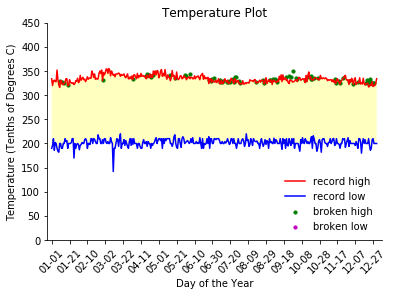

In [67]:
plt.figure()
plt.plot(Temp_high.values,'r', label = 'record high')
plt.plot(Temp_low.values,'b', label = 'record low')
plt.gca().fill_between(range(len(Temp_low)), Temp_low['Data_Value'], Temp_high['Data_Value'], facecolor='yellow', alpha=0.25)
plt.scatter(high_index,Broken_high.values, s=10, c='g', label = 'broken high')
plt.scatter(low_index,Broken_low.values, s=10, c='m', label = 'broken low')
plt.gca().axis([-5, 370,0, 450])
plt.xticks(range(0, len(Temp_high), 20), Temp_high.index[range(0, len(temp_min), 20)], rotation = '45')
plt.xlabel('Day of the Year')
plt.ylabel('Temperature (Tenths of Degrees C)')
plt.title('Temperature Plot')
plt.legend(loc = 4, frameon = False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


In [3]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/EEEZX_0FMEc" frameborder="0" allowfullscreen></iframe>